# **1. Install PRAW**

In [ ]:
!pip install praw
#import praw

In [1153]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 685.7 kB/s eta 0:00:0000:0100:01


In [1149]:
import praw
from dotenv import load_dotenv
import os
import requests
import pandas as pd
import nltk
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer



In [156]:
load_dotenv()

True

In [158]:
password = os.getenv('PASSWORD')

In [160]:
password

'Lhb4MM_XcUdFBfh3eq50w3BZU3H3yw'

# **2. Create a Reddit App**

To access the Reddit API, you'll need to create an application on Reddit and obtain your API credentials. Follow these steps:

- Go to the Reddit website (https://www.reddit.com/) and log in to your account. Feel free to create a throwaway account for this project!
- Navigate to the Reddit Apps page (https://www.reddit.com/prefs/apps).
- Click the "are you a developer? create an app..." button in the top left.
- Provide a name for your app (e.g., "PRAW"), select the app type ('script') , and optionally add a description. Use http://localhost:8080 as your redirect URI.
- After submitting the form, you will reach a page that looks like the following image. You'll see your application's details, including the client ID and client secret. Keep these credentials handy for the next step.


![Praw](https://www.honchosearch.com/hubfs/Imported_Blog_Media/Client-ID-Client-Secret.png)

# **3. Initialize PRAW**

In [162]:
reddit = praw.Reddit(
    client_id='W94W9nT4jRyy839IGnyGOw',
    client_secret= 'Lhb4MM_XcUdFBfh3eq50w3BZU3H3yw',
    user_agent='nlp_subreddit',
    username='Candid-Necessary9487',
    password= 'steven@28'   
)

Replace 'YOUR_CLIENT_ID', 'YOUR_CLIENT_SECRET', 'YOUR_USER_AGENT', 'YOUR_REDDIT_USERNAME', and 'YOUR_REDDIT_PASSWORD' with your actual Reddit API credentials.

Your user agent is an identifier used by reddit to identify the source of requests. You can make it whatever you want, but you'll want to choose something descriptive and unique, and it's recommended that your username is included.

**I have removed my own credentials from this workbook. We can show you how to hide your credentials before submitting the project! The following code will need your own credentials in order to successfully work.**

# 4. Take a look at the documentation [here](https://praw.readthedocs.io/)!

In [146]:
# Check to confirm if my credentials worked
subreddit = reddit.subreddit('soccer')

# Adjust the limit as needed -- Note that this will grab the 25 most recent posts
posts = subreddit.new(limit=4)

In [148]:
#just testing
for i in posts:
    print (i)

1dtxnuz
1dtxi6w
1dtxhvz
1dtxebc


## NOTE
- Reddit API Limitations: The Reddit API imposes limitations on the number of posts you can retrieve in a single request. The maximum number of posts per request is typically 100. Therefore, if you set the limit parameter to a value greater than 100, PRAW will make multiple requests behind the scenes to fetch the desired number of posts.
- Rate Limiting: The Reddit API also enforces rate limits to prevent abuse and ensure fair usage. The specific rate limits can vary depending on factors such as your Reddit account's age and karma. As a standard user, you're typically allowed to make 60 requests per minute. If you exceed the rate limit, you may receive an error response until the rate limit resets.
- TIP: You can use the created_utc attribute of a post to keep track of the timestamp and ensure non-overlapping pulls. The created_utc attribute represents the post's creation time in UTC.

In [166]:
# Here is a function that pulls post from subreddits
def get_posts(subreddit, num_posts):
    subreddit = reddit.subreddit(subreddit)
    posts = []
    for post in subreddit.new(limit=num_posts):
        posts.append([post.created_utc, post.title, post.selftext, post.subreddit])
    return pd.DataFrame(posts, columns=['created_utc', 'title', 'self_text', 'subreddit'])

In [646]:
# First set of dataset
sub1 = 'soccer'
sub2 = 'tennis'
num_posts = 1000

soc = get_posts(sub1, num_posts)
ten = get_posts(sub2, num_posts)

In [902]:
# Second set of dataset
sub1 = 'soccer'
sub2 = 'tennis'
num_posts = 1000

soc2 = get_posts(sub1, num_posts)
ten2 = get_posts(sub2, num_posts)

In [1024]:
# Third set of dataset
sub1 = 'soccer'
sub2 = 'tennis'
num_posts = 1000

soc3 = get_posts(sub1, num_posts)
ten3 = get_posts(sub2, num_posts)

In [427]:
# Fourth set of dataset

sub1_2 = 'soccer'
sub2_2 = 'tennis'
num_posts = 1000

df1_2 = get_posts(sub1_2, num_posts)
df2_2 = get_posts(sub2_2, num_posts)

In [1026]:
# Here is to combine all my dataset into one dataframe

soc['subreddit'] = 0
ten['subreddit'] = 1
soc2['subreddit'] = 0
ten2['subreddit'] = 1
soc3['subreddit'] = 0
ten3['subreddit'] = 1
df1_2['subreddit'] = 0
df2_2['subreddit'] = 1
# Combine dataframes
all_post_= pd.concat([soc, soc2, soc3, ten, ten2, ten3, df1_2, df2_2], ignore_index=True)
all_post_

,created_utc,title,self_text,subreddit
0,1.720353e+09,Alex Berenguer signs new deal at Athletic Club...,,0
1,1.720353e+09,Germany have hosted a World Cup or European Ch...,,0
2,1.720352e+09,"Toni Kroos after retiring from football: ""So t...",,0
3,1.720352e+09,[Matteo Moretto] Negotiations between Milan an...,,0
4,1.720352e+09,Miguel Almiron is in talks with his representa...,,0
...,...,...,...,...
7713,1.718385e+09,ATP Stuttgart QF: [5] Musetti def. [3] Bublik ...,,1
7714,1.718384e+09,I have seen enough. Nole is winning Wimbledon.,https://www.instagram.com/reel/C8M_7guIyZ7/?ig...,1
7715,1.718381e+09,Presenting Karue Sell's lesser known brother T...,,1
7716,1.718379e+09,Stuttgart QF: M. Berrettini d. J. Duckworth 6-...,Berrettini on grass is the real deal.\n\nHe wi...,1


In [1271]:
all_post_.columns

Index(['created_utc', 'title', 'self_text', 'subreddit'], dtype='object')

In [1028]:
#Check the number of post extracted fir each subreddit

all_post_['subreddit'].value_counts()

subreddit
1    3903
0    3815
Name: count, dtype: int64

Remember, you will need to pull *at least* 1000 posts from each subreddit, not just 25. Like I mentioned above, you can use the created_utc attribute of a post to keep track of the timestamp and ensure non-overlapping pulls. We will leave this work for you all to complete.

Once you have at least 1000 posts from each subreddit, you can do some EDA (perhaps maybe the most common words in each subreddit..?) Eventually, you will want to combine your two dataframes together to do modeling.

### Note: Rather than working in this template notebook, make a brand new "scraping" notebook (or script), with your own comments, so you can use this project in a portfolio!

In [1030]:
# Make a copy of my main DataFrame
post = all_post_.copy()

In [1032]:
post['subreddit'].value_counts()

subreddit
1    3903
0    3815
Name: count, dtype: int64

In [1034]:
# Combine title and body into one column 'text'
post['text'] = post['title'] + ' ' + post['self_text']
post

,created_utc,title,self_text,subreddit,text
0,1.720353e+09,Alex Berenguer signs new deal at Athletic Club...,,0,Alex Berenguer signs new deal at Athletic Club...
1,1.720353e+09,Germany have hosted a World Cup or European Ch...,,0,Germany have hosted a World Cup or European Ch...
2,1.720352e+09,"Toni Kroos after retiring from football: ""So t...",,0,"Toni Kroos after retiring from football: ""So t..."
3,1.720352e+09,[Matteo Moretto] Negotiations between Milan an...,,0,[Matteo Moretto] Negotiations between Milan an...
4,1.720352e+09,Miguel Almiron is in talks with his representa...,,0,Miguel Almiron is in talks with his representa...
...,...,...,...,...,...
7713,1.718385e+09,ATP Stuttgart QF: [5] Musetti def. [3] Bublik ...,,1,ATP Stuttgart QF: [5] Musetti def. [3] Bublik ...
7714,1.718384e+09,I have seen enough. Nole is winning Wimbledon.,https://www.instagram.com/reel/C8M_7guIyZ7/?ig...,1,I have seen enough. Nole is winning Wimbledon....
7715,1.718381e+09,Presenting Karue Sell's lesser known brother T...,,1,Presenting Karue Sell's lesser known brother T...
7716,1.718379e+09,Stuttgart QF: M. Berrettini d. J. Duckworth 6-...,Berrettini on grass is the real deal.\n\nHe wi...,1,Stuttgart QF: M. Berrettini d. J. Duckworth 6-...


In [1038]:
post = post[['text', 'subreddit']]
post

,text,subreddit
0,Alex Berenguer signs new deal at Athletic Club...,0
1,Germany have hosted a World Cup or European Ch...,0
2,"Toni Kroos after retiring from football: ""So t...",0
3,[Matteo Moretto] Negotiations between Milan an...,0
4,Miguel Almiron is in talks with his representa...,0
...,...,...
7713,ATP Stuttgart QF: [5] Musetti def. [3] Bublik ...,1
7714,I have seen enough. Nole is winning Wimbledon....,1
7715,Presenting Karue Sell's lesser known brother T...,1
7716,Stuttgart QF: M. Berrettini d. J. Duckworth 6-...,1


In [1040]:
# Remove duplicates

post = post.drop_duplicates(subset='text')
post.head()

,text,subreddit
0,Alex Berenguer signs new deal at Athletic Club...,0
1,Germany have hosted a World Cup or European Ch...,0
2,"Toni Kroos after retiring from football: ""So t...",0
3,[Matteo Moretto] Negotiations between Milan an...,0
4,Miguel Almiron is in talks with his representa...,0


In [1042]:
# Drop missing values
post.dropna(inplace=True)

/var/folders/xl/y_djts9n7858xsff1znygpsm0000gn/T/ipykernel_79579/3072471542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post.dropna(inplace=True)


In [1046]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [1048]:
# Text preprocessing function
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

In [1050]:
# Apply the preprocessing function.
post['text'] = post['text'].apply(preprocess_text)

/var/folders/xl/y_djts9n7858xsff1znygpsm0000gn/T/ipykernel_79579/2252455630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post['text'] = post['text'].apply(preprocess_text)


In [1060]:
# Assign post from each subreddit
soccer = post[post['subreddit'] == 0]['text']
tennis = post[post['subreddit'] == 1]['text']

In [1062]:
soccer

0       alex berenguer sign new deal athletic club val...
1       germany hosted world cup european championship...
2       toni kroos retiring football take break least ...
3       matteo moretto negotiation milan tottenham ent...
4       miguel almiron talk representative newcastle f...
                              ...                        
6736    fc bayern josip stanišić extended contract fc ...
6737    ac milan ac milan announces formally received ...
6738                    goal scored euro group stage jump
6739    huge sinkhole deep open middle illinois footba...
6740    milan want lukaku loan next season chelsea mom...
Name: text, Length: 1855, dtype: object

In [1064]:
tennis

2864    throwback federer perfected art grass court te...
2865    ash barty confirms definitely return play tenn...
2866    ostapenko gave ticket match ukrainian junior p...
2867          andy murray hugh dennis play line mock week
2868    funny advertisement currently vacation sardini...
                              ...                        
7713              atp stuttgart qf musetti def bublik ret
7714              seen enough nole winning wimbledon http
7715    presenting karue sell lesser known brother tom...
7716    stuttgart qf berrettini duckworth berrettini g...
7717                               feeling dream come iga
Name: text, Length: 1425, dtype: object

In [1066]:
# Combine all posts into a single string
all_text_soc = ' '.join(soccer)
all_text_ten = ' '.join(tennis)

In [1068]:
# Tokenize the combined text
tokens_soc = nltk.word_tokenize(all_text_soc.lower())
tokens_ten = nltk.word_tokenize(all_text_ten.lower())

In [1072]:
# Confirm that this has been done
tokens_soc[:4]

['alex', 'berenguer', 'sign', 'new']

In [1074]:
# Remove stopwords and perform lemmatization
tokens_soc = [lemmatizer.lemmatize(word) for word in tokens_soc if word.isalpha() and word not in stop_words]
tokens_ten = [lemmatizer.lemmatize(word) for word in tokens_ten if word.isalpha() and word not in stop_words]

In [1088]:
# Count the frequency of each word
word_freq_soc = Counter(tokens_soc)

In [1110]:
# Get the most common words
common_words_soc = word_freq_soc.most_common(10)
common_words_soc

[('goal', 444),
 ('shot', 432),
 ('substitution', 425),
 ('right', 358),
 ('match', 348),
 ('club', 333),
 ('player', 302),
 ('box', 302),
 ('league', 286),
 ('replaces', 279)]

In [1112]:
# Convert to DataFrame
df_common_words_soc = pd.DataFrame(common_words_soc, columns=['Word', 'Frequency'])
df_common_words_soc

,Word,Frequency
0,goal,444
1,shot,432
2,substitution,425
3,right,358
4,match,348
5,club,333
6,player,302
7,box,302
8,league,286
9,replaces,279


In [1114]:
# Separate words and their frequencies for plotting
words, frequencies = zip(*common_words_soc)

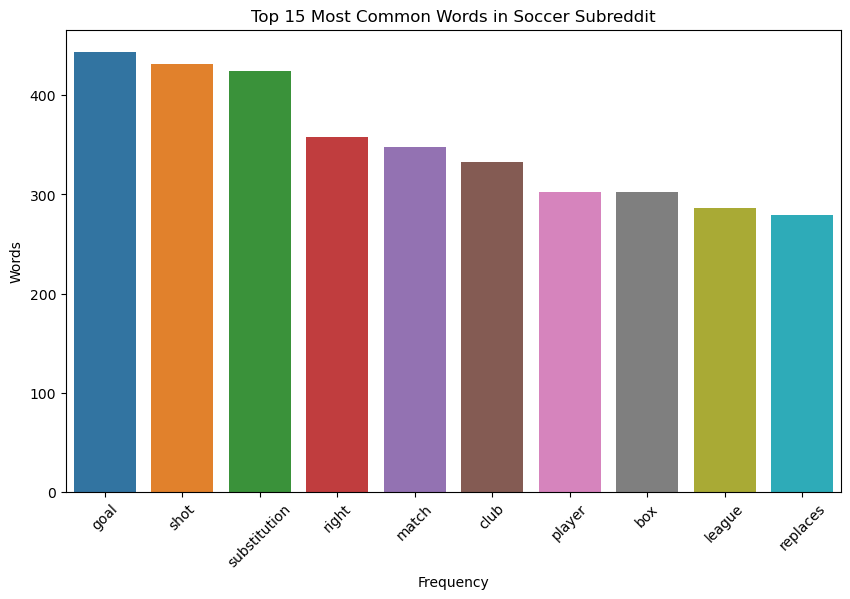

In [1116]:
# Plot the most common words
plt.figure(figsize=(10, 6))
plt.xticks(rotation = 45)
sns.barplot(data = df_common_words_soc, x = 'Word', y = 'Frequency')
plt.title('Top 15 Most Common Words in Soccer Subreddit')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.savefig('top_15_most_common_words_soccer_subreddit.png', bbox_inches='tight')

In [1118]:
# Count the frequency of each word
word_freq_ten = Counter(tokens_ten)

In [1122]:
# Get the most common words
common_words_ten = word_freq_ten.most_common(10)
common_words_ten

[('http', 576),
 ('wimbledon', 571),
 ('match', 443),
 ('def', 349),
 ('play', 319),
 ('v', 296),
 ('player', 292),
 ('win', 289),
 ('tennis', 235),
 ('think', 212)]

In [1124]:
# Convert to DataFrame
df_common_words_ten = pd.DataFrame(common_words_ten, columns=['Word', 'Frequency'])
df_common_words_ten

,Word,Frequency
0,http,576
1,wimbledon,571
2,match,443
3,def,349
4,play,319
5,v,296
6,player,292
7,win,289
8,tennis,235
9,think,212


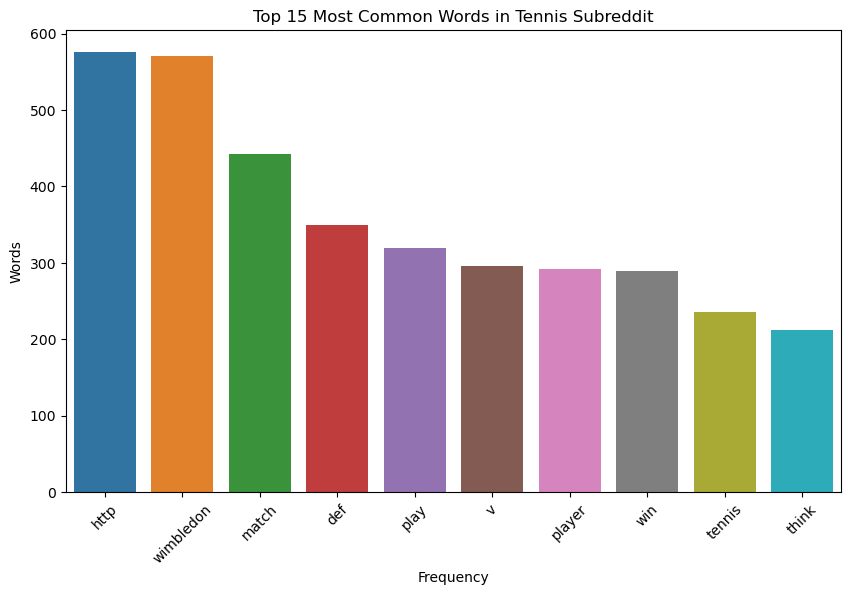

In [1126]:
# Plot the most common words
plt.figure(figsize=(10, 6))
plt.xticks(rotation = 45)
sns.barplot(data = df_common_words_ten, x = 'Word', y = 'Frequency')
plt.title('Top 15 Most Common Words in Tennis Subreddit')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.savefig('top_15_most_common_words_tennis_subreddit.png', bbox_inches='tight')

In [1142]:
#Side by side comparison of the top 10 most common words
shw_comp = pd.DataFrame({
    'soccer': df_common_words_soc['Word'],
    'tennis': df_common_words_ten['Word']
})
shw_comp

,soccer,tennis
0,goal,http
1,shot,wimbledon
2,substitution,match
3,right,def
4,match,play
5,club,v
6,player,player
7,box,win
8,league,tennis
9,replaces,think


## Topic modeling

Topic 1:
['substitution', 'goal', 'replaces', 'uruguay', 'shot', 'brazil', 'card', 'sub', 'panama', 'colombia']
Topic 2:
['league', 'year', 'player', 'club', 'def', 'team', 'time', 'england', 'right', 'season']
Topic 3:
['http', 'score', 'draw', 'spain', 'play', 'venezuela', 'france', 'order', 'canada', 'portugal']
Topic 4:
['match', 'wimbledon', 'win', 'player', 'think', 'set', 'good', 'play', 'round', 'like']
Topic 5:
['sign', 'deal', 'united', 'romano', 'penalty', 'contract', 'portugal', 'slovenia', 'club', 'new']
topic             0         1         2         3         4
subreddit                                                  
0          0.131536  0.354178  0.091105  0.081402  0.341779
1          0.073684  0.193684  0.083509  0.596491  0.052632


/var/folders/xl/y_djts9n7858xsff1znygpsm0000gn/T/ipykernel_79579/2976236209.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post['topic'] = lda.transform(X_counts).argmax(axis=1)


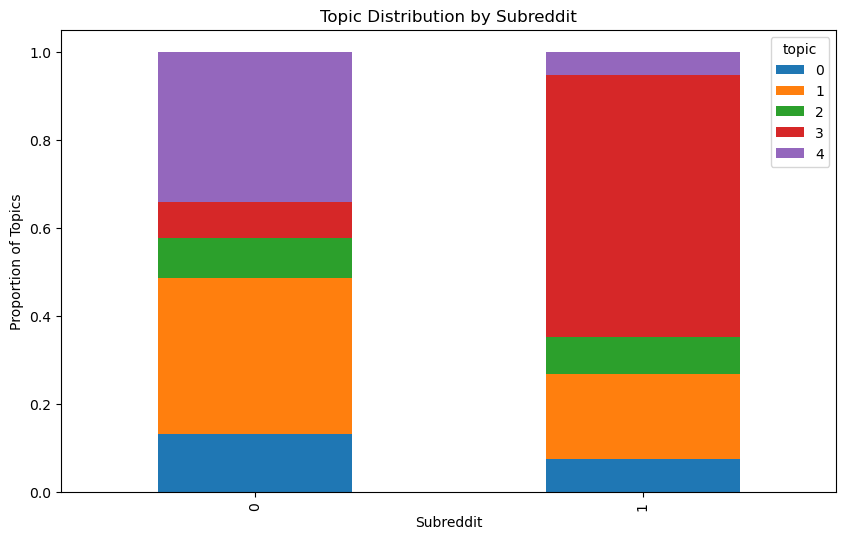

In [1256]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit-transform the text data
X_counts = count_vectorizer.fit_transform(post['text'])

# Perform LDA
num_topics = 5  # Adjust as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X_counts)

# Display the top words for each topic
words = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print([words[i] for i in topic.argsort()[:-11:-1]])

# Assign topics to each post
post['topic'] = lda.transform(X_counts).argmax(axis=1)

# Analyze topic distribution per subreddit
topic_distribution = post.groupby('subreddit')['topic'].value_counts(normalize=True).unstack().fillna(0)

# Display the topic distribution
print(topic_distribution)

# Visualize the topic distribution
topic_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Topic Distribution by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Proportion of Topics')
plt.savefig('Most Common Topics.png', bbox_inches='tight')

In [1112]:
# Convert to DataFrame
df_common_words_soc = pd.DataFrame(common_words_soc, columns=['Word', 'Frequency'])
df_common_words_soc

,Word,Frequency
0,goal,444
1,shot,432
2,substitution,425
3,right,358
4,match,348
5,club,333
6,player,302
7,box,302
8,league,286
9,replaces,279


## Sentiment Analysis

subreddit
0    0.070494
1    0.076476
Name: sentiment, dtype: float64


/var/folders/xl/y_djts9n7858xsff1znygpsm0000gn/T/ipykernel_79579/3424143246.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post['sentiment'] = post['text'].apply(get_sentiment)


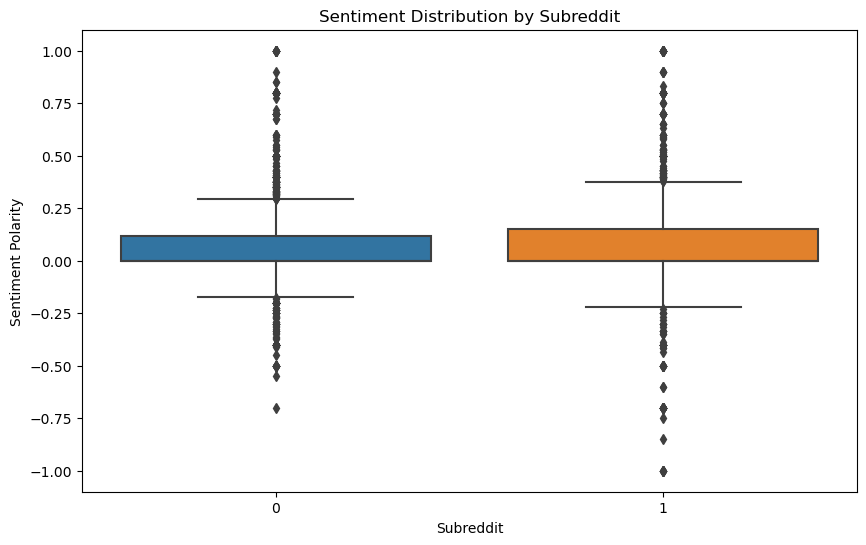

In [1158]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each post
post['sentiment'] = post['text'].apply(get_sentiment)

# Analyze average sentiment per subreddit
avg_sentiment = post.groupby('subreddit')['sentiment'].mean()

# Display the average sentiment
print(avg_sentiment)

# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='subreddit', y='sentiment', data=post)
plt.title('Sentiment Distribution by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Sentiment Polarity')
plt.savefig('Sentimental Analysis.png', bbox_inches='tight')

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(subreddit1_sentiments, color='blue', kde=True, label=subreddit1)
sns.histplot(subreddit2_sentiments, color='red', kde=True, label=subreddit2)
plt.title('Sentiment Distribution by Subreddit')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [1170]:
post.head()

,text,subreddit,cluster,topic,sentiment
0,alex berenguer sign new deal athletic club val...,0,0,4,0.136364
1,germany hosted world cup european championship...,0,4,1,0.056250
2,toni kroos retiring football take break least ...,0,0,1,-0.275000
3,matteo moretto negotiation milan tottenham ent...,0,0,1,-0.083333
4,miguel almiron talk representative newcastle f...,0,0,1,0.000000


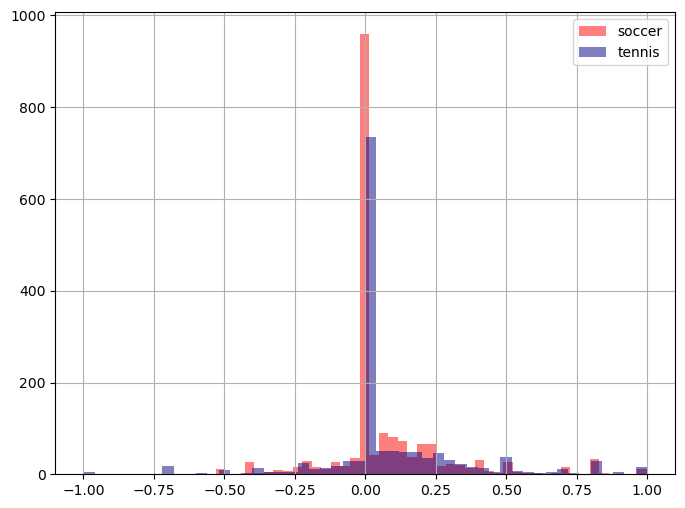

In [1174]:
plt.figure(figsize=(8, 6))
post[post['subreddit'] == 0]['sentiment'].hist(color='red', label='soccer', alpha=0.5, bins = 50)
post[post['subreddit'] == 1]['sentiment'].hist(color='navy', label='tennis', alpha=0.5, bins = 50)
plt.legend()
plt.savefig('Sentimental Analysis 2.png', bbox_inches='tight')

In [1176]:
X = post['text']
y = post['subreddit']

In [1178]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1180]:
X_train.shape

(2624,)

In [1182]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [1232]:
# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_vect, y_train)
lr_pred = lr_model.predict(X_test_vect)
lr_test_score =  lr_model.score(X_test_vect, y_test)
lr_test_score

0.961890243902439

In [1186]:
lr_c_mat = confusion_matrix(y_test, lr_pred)
lr_c_mat

array([[382,   3],
       [ 22, 249]])

In [1234]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vect, y_train)
rf_pred = rf_model.predict(X_test_vect)
rf_test_score =  rf_model.score(X_test_vect, y_test)
rf_test_score

0.9527439024390244

In [1200]:
rf_c_mat = confusion_matrix(y_test, rf_pred)
rf_c_mat

array([[359,  26],
       [  3, 268]])

In [1236]:
# Instantiate SVM
svc = SVC()

# Define the parameter grid
pgrid = {"C": np.linspace(0.0001, 2, 10)}

# Instantiate GridSearchCV
gcv = GridSearchCV(svc, pgrid, cv=5, n_jobs=4)

# Fit GridSearchCV on training data
gcv.fit(X_train_vect, y_train)

# Best parameters and best score
print(f"Best parameters: {gcv.best_params_}")
print(f"Best score: {gcv.best_score_}")

svc_pred = gcv.predict(X_test_vect)

# Evaluate on test data
svc_test_score = gcv.score(X_test_vect, y_test)
print(f"Test score: {svc_test_score}")

Best parameters: {'C': 1.5555777777777777}
Best score: 0.9676015994183933
Test score: 0.9740853658536586


In [1208]:
# Evaluation function
def evaluate_model(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))

In [1210]:
lr_c_mat = confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [1212]:
# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
evaluate_model(y_test, lr_pred)

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       385
           1       0.99      0.92      0.95       271

    accuracy                           0.96       656
   macro avg       0.97      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656

Confusion Matrix:
 [[382   3]
 [ 22 249]]
Accuracy: 0.961890243902439


In [1214]:
# Evaluate Random Forest model
print("Random Forest Model Evaluation:")
evaluate_model(y_test, rf_pred)

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       385
           1       0.91      0.99      0.95       271

    accuracy                           0.96       656
   macro avg       0.95      0.96      0.95       656
weighted avg       0.96      0.96      0.96       656

Confusion Matrix:
 [[359  26]
 [  3 268]]
Accuracy: 0.9557926829268293


In [1218]:
# Evaluate Random Forest model
print("SVM Model Evaluation:")
evaluate_model(y_test, svc_pred)

SVM Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       385
           1       0.98      0.95      0.97       271

    accuracy                           0.97       656
   macro avg       0.98      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656

Confusion Matrix:
 [[381   4]
 [ 13 258]]
Accuracy: 0.9740853658536586


In [1238]:
best_mod = max([lr_test_score, rf_test_score, svc_test_score])
best_mod

0.9740853658536586

In [1252]:
# Summarize findings
print("Summary:")
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, lr_pred))
print("Random Forest Model Accuracy:", accuracy_score(y_test, rf_pred))
print("SVM Model Accuracy:", accuracy_score(y_test, svc_pred))

best_mod = max([lr_test_score, rf_test_score, svc_test_score])

# Recommendations
if best_mod == lr_test_score:
    print("Logistic Regression performs better than other models for this dataset.")
if best_mod == rf_test_score:
    print("Random Forest performs better than other models for this dataset.")
if best_mod == svc_test_score:
    print("SVM performs better than other models for this dataset.")

Summary:
Logistic Regression Model Accuracy: 0.961890243902439
Random Forest Model Accuracy: 0.9527439024390244
SVM Model Accuracy: 0.9740853658536586
SVM performs better than other models for this dataset.


In [1263]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr_scores = cross_val_score(lr_model, X_train_vect, y_train, cv=5, scoring='accuracy')

# Random Forest
rf_scores = cross_val_score(rf_model, X_train_vect, y_train, cv=5, scoring='accuracy')

# SVM
svc_scores = cross_val_score(svc, X_train_vect, y_train, cv=5, scoring='accuracy')

# Logistic Regression
lr_mean_accuracy = np.mean(lr_scores)
lr_std_dev = np.std(lr_scores)

# Random Forest
rf_mean_accuracy = np.mean(rf_scores)
rf_std_dev = np.std(rf_scores)

# SVM
svc_mean_accuracy = np.mean(svc_scores)
svc_std_dev = np.std(svc_scores)

# Print results
print(f"Logistic Regression: Mean Accuracy = {lr_mean_accuracy:.4f}, Standard Deviation = {lr_std_dev:.4f}")
print(f"Random Forest: Mean Accuracy = {rf_mean_accuracy:.4f}, Standard Deviation = {rf_std_dev:.4f}")
print(f"SVM: Mean Accuracy = {svc_mean_accuracy:.4f}, Standard Deviation = {svc_std_dev:.4f}")


Logistic Regression: Mean Accuracy = 0.9451, Standard Deviation = 0.0150
Random Forest: Mean Accuracy = 0.9390, Standard Deviation = 0.0147
SVM: Mean Accuracy = 0.9657, Standard Deviation = 0.0075


In [ ]:
Logistic Regression: Mean Accuracy = 0.9451, Standard Deviation = 0.0150
Random Forest: Mean Accuracy = 0.9390, Standard Deviation = 0.0147
SVM: Mean Accuracy = 0.9657, Standard Deviation = 0.0075